<a href="https://colab.research.google.com/github/polinakochneva1/me_labs_house/blob/main/3%D0%BB%D0%B0%D0%B1%D0%B0-%D0%93%D0%B5%D0%BE%D1%80%D0%B3%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

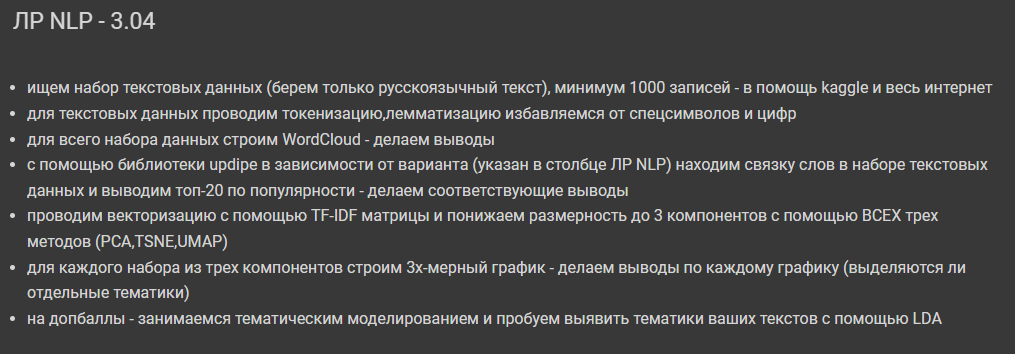

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('/content/text.xlsx')
df.head()

,id,text
0,0,Друзья познаются в беде.
1,1,"Не имей сто рублей, а имей сто друзей."
2,2,"Скажи мне кто твой друг, и я скажу, кто ты."
3,3,"С кем поведешься, от того и наберешься."
4,4,Одинокое дерево ветер легче валит.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      1143 non-null   int64 
 1   text    1143 non-null   object
dtypes: int64(1), object(1)
memory usage: 18.0+ KB


# **Предобработка данных**

In [4]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 56.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=fb8989ac72c80672cc184e927fb5de589a802a95b98e6a746fb6cd87d2c11632
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [5]:
import numpy as np
import re
import nltk
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pymorphy2
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
text=df['text'] #берем столбец с текстом
norm_text=[]
# 1 - только буквы
# 2 - перевод в нижний регистр
# 3 - привести все слова в единую форму
morph=pymorphy2.MorphAnalyzer()
for s in tqdm(text):
    s1 = re.sub(r'[^\w\s]+|[\d]+', r'',s).strip()
    s1 = s1.lower()
    s1 = word_tokenize(s1) #токенизация
    words=[]
    for i in s1:
        pv = morph.parse(i)
        words.append(pv[0].normal_form)
    sentence=' '.join(words)
    norm_text.append(sentence)

100%|██████████| 1143/1143 [00:02<00:00, 506.12it/s]


In [7]:
text[1]#результат

'Не имей сто рублей, а имей сто друзей.'

In [8]:
norm_text[1]#результат

'не иметь сто рубль а иметь сто друг'

# **WordCloud**

In [9]:
df['norm_text']=norm_text

In [14]:
cat23 = df[df['id']==23]['norm_text'].values
cat23 = ' '.join(cat23)
cat23

'не хвалиться друг в три день а хвалиться в три год'

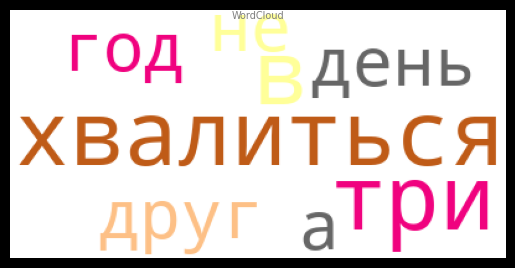

In [15]:
fig = plt.figure()
fig.patch.set_facecolor('black')
plt.subplots_adjust(wspace=0.3, hspace=0.2)

wordcloud = WordCloud(colormap='Accent', background_color='white', contour_width=10).generate(cat23)
plt.tick_params(labelsize=10)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('WordCloud',fontdict={'fontsize':7,'color':'grey'},y=0.93)
plt.tick_params(labelsize=10)

# **UDPipe**

In [18]:
df.drop_duplicates(keep='first',inplace=True)
df.head()

,id,text,norm_text
0,0,Друзья познаются в беде.,друг познаваться в беда
1,1,"Не имей сто рублей, а имей сто друзей.",не иметь сто рубль а иметь сто друг
2,2,"Скажи мне кто твой друг, и я скажу, кто ты.",сказать я кто твой друг и я сказать кто ты
3,3,"С кем поведешься, от того и наберешься.",с кто повестись от тот и набраться
4,4,Одинокое дерево ветер легче валит.,одинокий дерево ветер лёгкий валита


In [17]:
!pip install ufal.udpipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 936.8/936.8 kB 7.7 MB/s eta 0:00:00


In [19]:
# Подключаем синтаксической анализатор и его части.
import ufal.udpipe
from ufal.udpipe import Model, Pipeline, ProcessingError

# Для отрисовки деревьев нам потребуются вот эти библиотеки.

from collections import defaultdict
from tqdm.auto import tqdm
import random

In [20]:
UDPIPE_MODEL_FN = "model_ru.udpipe"
!wget -O {UDPIPE_MODEL_FN} https://github.com/jwijffels/udpipe.models.ud.2.0/blob/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe?raw=true

--2024-04-07 11:30:33--  https://github.com/jwijffels/udpipe.models.ud.2.0/blob/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jwijffels/udpipe.models.ud.2.0/raw/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe [following]
--2024-04-07 11:30:33--  https://github.com/jwijffels/udpipe.models.ud.2.0/raw/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jwijffels/udpipe.models.ud.2.0/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe [following]
--2024-04-07 11:30:33--  https://raw.githubusercontent.com/jwijffels/udpipe.models.ud.2.0/master/inst/udpipe-ud-2.0-170801/russian-ud-2.0-170801.udpipe
Re

In [21]:
#загружаем модель
model = Model.load(UDPIPE_MODEL_FN)

In [22]:
# Токенизатор со снятием омонимии.
tokenizer = model.newTokenizer(model.DEFAULT)
# Объект для отображения результатов разбора.
conlluOutput = ufal.udpipe.OutputFormat.newOutputFormat("conllu")
# Объект предложения, в которое будет осуществляться разбор.
sentence = ufal.udpipe.Sentence()
# Объект для ошибок, возникающих в ходе разбора.
error = ufal.udpipe.ProcessingError()

In [24]:
df['text'][5]

'Старый друг, лучше новых двух.'

In [25]:
#кормим токенизатору наш текст
tokenizer.setText(df['text'][5])

In [26]:
#Далее предложение передается на морфологическую разметку со снятием омонимии (тэггинг) и синтаксический анализ (парсинг).
# мы будем использовать формат conllu
tokenizer.nextSentence(sentence, error)
model.tag(sentence, model.DEFAULT)
model.parse(sentence, model.DEFAULT)
print(conlluOutput.writeSentence(sentence))

# newdoc
# newpar
# sent_id = 1
# text = Старый друг, лучше новых двух.
1	Старый	Старый	ADJ	JJL	Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing	2	amod	_	_
2	друг	ДРУГ	NOUN	NN	Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing	0	root	_	SpaceAfter=No
3	,	,	PUNCT	,	_	2	punct	_	_
4	лучше	ХОРОШО	ADV	RBR	Degree=Cmp	5	advmod	_	_
5	новых	НОВЫЙ	ADJ	JJL	Animacy=Inan|Case=Gen|Number=Plur	6	amod	_	_
6	двух	ДВА	NUM	CD	Animacy=Anim|Case=Gen|Gender=Masc|NumType=Card	2	obj	_	SpaceAfter=No
7	.	.	PUNCT	.	_	2	punct	_	SpaceAfter=No




In [27]:
df_sentence = pd.DataFrame(columns=['head','lemma','form','upostag','feats','deprel','misc'])

In [28]:
for i, word in enumerate(sentence.words):
  df_sentence.loc[len(df_sentence)] = [word.head, word.lemma, word.form, word.upostag, word.feats, word.deprel, word.misc]
    #print(i, "->", word.head, word.lemma, "[", word.form, "]", word.upostag, word.feats, word.deprel, word.misc)
df_sentence

,head,lemma,form,upostag,feats,deprel,misc
0,-1,<root>,<root>,<root>,<root>,,
1,2,Старый,Старый,ADJ,Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing,amod,
2,0,ДРУГ,друг,NOUN,Animacy=Anim|Case=Nom|Gender=Masc|Number=Sing,root,SpaceAfter=No
3,2,",",",",PUNCT,,punct,
4,5,ХОРОШО,лучше,ADV,Degree=Cmp,advmod,
5,6,НОВЫЙ,новых,ADJ,Animacy=Inan|Case=Gen|Number=Plur,amod,
6,2,ДВА,двух,NUM,Animacy=Anim|Case=Gen|Gender=Masc|NumType=Card,obj,SpaceAfter=No
7,2,.,.,PUNCT,,punct,SpaceAfter=No


In [35]:
#Возьмем текст и выделим из него все сочетания "существительное+прилагательное".
def find_child_Ng(sentence, parent):
    """ Функция поиска всех потомков вершины с номером parent, являющихся
    существительными в родительном падеже.
    """
    children = []
    for i, word in enumerate(sentence.words):
        if word.head == parent and word.upostag == "NOUN" and "adjective" in word.feats:
            children.append(i)
    return children

def find_NNg(sentence, combinations):
    """ Функция поиска сочетаний "существительное + прилагательное".
    """
    for i, word in enumerate(sentence.words):
        if word.upostag == "NOUN":
            children = find_child_Ng(sentence, i)
            if children != []:
                #print(word.lemma, [sentence.words[k].form for k in children])
                for child in children:
                    combinations[word.lemma][sentence.words[child].form] += 1

In [36]:
combinations = defaultdict(lambda:defaultdict(int))

for text in tqdm(df['text'][:1000]):
    tokenizer.setText(text) # Установить текст.
    while tokenizer.nextSentence(sentence, error): # Полчаем следующее предложение.
        model.tag(sentence, model.DEFAULT) # Токенизация.
        model.parse(sentence, model.DEFAULT) # Синтаксический анализ.
        find_NNg(sentence, combinations) # Поиск сочетаний.

  0%|          | 0/1000 [00:00<?, ?it/s]

In [37]:
df_nn=pd.DataFrame(columns=['parent','children','freq'])
for parent, childs in combinations.items():
    for child, freq in childs.items():
        if freq > 20:
            df_nn.loc[len(df_nn)] = [parent, child,freq]

In [38]:
df_nn.sort_values(by='freq',ascending=False).head(20)

,parent,children,freq


# **Векторизация**

In [39]:
russian_stopwords = stopwords.words("russian") #стоп-слова
vectorizer = CountVectorizer(max_features=500, min_df=20, max_df=0.7, stop_words=russian_stopwords)
text_cv = vectorizer.fit_transform(norm_text)
text_cv = pd.DataFrame(text_cv.toarray(),columns=vectorizer.get_feature_names_out())

In [40]:
text_cv.head()

,весь,вода,всё,дело,друг,зима,знать,свой,слово,хороший,человек,язык
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
vectorizer_tfidf = TfidfVectorizer(max_features=500, min_df=20, max_df=0.7, stop_words=russian_stopwords)
text_tfidf = vectorizer_tfidf.fit_transform(norm_text)
text_tfidf = pd.DataFrame(text_tfidf.toarray(),columns=vectorizer_tfidf.get_feature_names_out())
text_tfidf.head()

,весь,вода,всё,дело,друг,зима,знать,свой,слово,хороший,человек,язык
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
text[0]

'«'

In [43]:
text[3]

'н'

In [44]:
text_cv['id']=df['id']
text_cv['text']=df['text']
text_cv.head()

,весь,вода,всё,дело,друг,зима,знать,свой,слово,хороший,человек,язык,id,text
0,0,0,0,0,1,0,0,0,0,0,0,0,0,Друзья познаются в беде.
1,0,0,0,0,1,0,0,0,0,0,0,0,1,"Не имей сто рублей, а имей сто друзей."
2,0,0,0,0,1,0,0,0,0,0,0,0,2,"Скажи мне кто твой друг, и я скажу, кто ты."
3,0,0,0,0,0,0,0,0,0,0,0,0,3,"С кем поведешься, от того и наберешься."
4,0,0,0,0,0,0,0,0,0,0,0,0,4,Одинокое дерево ветер легче валит.


**Понижение размерности и визуализация**

In [52]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pymorphy2
import plotly.graph_objs as go
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')

#векторизация
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 4.9 MB/s eta 0:00:00


In [47]:
#понижение размерности
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [54]:
def show_fig(new_shape):

    fig = go.Figure(go.Scatter3d(x=new_shape[:, 0],
                        y=new_shape[:, 1],
                        z=new_shape[:, 2],
                        marker=dict(opacity=0.9,
                                    reversescale=True,
                                    colorscale='Blues',
                                    size=5),
                        line=dict (width=0.02),
                        mode='markers',
                                 text=df['text']))
    fig.update_layout(
        scene = dict(
            xaxis = dict(nticks=4),
                         yaxis = dict(nticks=4),
                         zaxis = dict(nticks=4),),
        width=700,
        margin=dict(r=20, l=10, b=10, t=10))
    fig.show()

In [55]:
pca=PCA(n_components=3)
reduced_pca = pca.fit_transform(text_tfidf)
show_fig(reduced_pca)

In [56]:
tsne=TSNE(n_components=3)
reduced_tsne = tsne.fit_transform(text_tfidf)
show_fig(reduced_tsne)

In [57]:
import umap
umap_emb = umap.UMAP(n_components=3)
reduced_umap = umap_emb.fit_transform(text_tfidf)
show_fig(reduced_umap)

# **Выделение тематик**

In [58]:
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=5, random_state=42)
LDA.fit(text_tfidf)
for i,topic in enumerate(LDA.components_):
    print(f'5 слов для темы #{i}:')
    print([vectorizer_tfidf.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

5 слов для темы #0:
['зима', 'дело', 'знать', 'свой', 'весь', 'вода', 'человек', 'хороший', 'всё', 'друг']


5 слов для темы #1:
['зима', 'человек', 'знать', 'хороший', 'всё', 'язык', 'свой', 'дело', 'слово', 'весь']


5 слов для темы #2:
['хороший', 'весь', 'всё', 'вода', 'свой', 'слово', 'друг', 'дело', 'язык', 'человек']


5 слов для темы #3:
['слово', 'всё', 'весь', 'дело', 'вода', 'друг', 'свой', 'зима', 'знать', 'хороший']


5 слов для темы #4:
['зима', 'дело', 'человек', 'друг', 'всё', 'хороший', 'весь', 'знать', 'свой', 'вода']




In [59]:
!pip install --upgrade gensim

In [60]:
text_clean= []
for row in norm_text:
        text_clean.append(row.split())

from gensim.models import Phrases
bigram = Phrases(text_clean)
trigram = Phrases(bigram[text_clean])

for idx in range(len(text_clean)):
    for token in bigram[text_clean[idx]]:
        if '_' in token:

            text_clean[idx].append(token)
    for token in trigram[text_clean[idx]]:
        if '_' in token:
          text_clean[idx].append(token)

In [61]:
from gensim.corpora.dictionary import Dictionary
from numpy import array
dictionary = Dictionary(text_clean)
dictionary.filter_extremes(no_below=10, no_above=0.1)
corpus = [dictionary.doc2bow(doc) for doc in text_clean]
print('Количество уникальных токенов: %d' % len(dictionary))
print('Количество документов: %d' % len(corpus))

Количество уникальных токенов: 95
Количество документов: 1143


In [62]:
from gensim.models.ldamulticore import LdaMulticore
model=LdaMulticore(corpus=corpus,id2word=dictionary, num_topics=2)
model.show_topics()

[(0,
  '0.075*"вода" + 0.044*"с" + 0.044*"на" + 0.034*"а" + 0.031*"он" + 0.026*"друг" + 0.022*"ты" + 0.021*"я" + 0.021*"за" + 0.019*"хороший"'),
 (1,
  '0.056*"а" + 0.039*"что" + 0.035*"на" + 0.031*"быть" + 0.030*"вода" + 0.026*"как" + 0.025*"свой" + 0.024*"с" + 0.024*"друг" + 0.022*"без"')]

In [63]:
!pip install fastapi kaleido python-multipart uvicorn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00


In [64]:
!pip uninstall pandas
!pip install pandas==2.0.0

Found existing installation: pandas 2.0.3
Uninstalling pandas-2.0.3:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/pandas-2.0.3.dist-info/*
    /usr/local/lib/python3.10/dist-packages/pandas/*
Proceed (Y/n)?   ERROR: Operation cancelled by user
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 27.1 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.3
    Uninstalling pandas-2.0.3:
      Successfully uninstalled pandas-2.0.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.0.3, but you have pandas 2.0.0 which is incompatible.


In [65]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 16.0 MB/s eta 0:00:00


In [66]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import gensim
pyLDAvis.enable_notebook()
data = gensimvis.prepare(model, corpus, dictionary)
pyLDAvis.display(data)